In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

#gmap
import gmaps

# Google developer API key
from config import g_key
gmaps.configure(api_key=g_key)

from geopy.geocoders import GoogleV3

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# Read csv files
data_engineer = pd.read_csv("Resources/input_folder/DataEngineer.csv")
data_analyst = pd.read_csv("Resources/input_folder/DataAnalyst.csv")
data_science = pd.read_csv("Resources/input_folder/DataScientist.csv")

# Data cleaning
data_analyst = data_analyst.drop(columns=["Unnamed: 0"])
data_science = data_science.drop(columns=["Unnamed: 0","index"])

In [3]:
# concatinate all 3 dataframe into final dataframe

list_df = [data_science, data_analyst, data_engineer]
final_df = pd.concat(list_df)

# Data cleaning
final_df = final_df.drop(['Job Description','Rating','Headquarters','Size','Founded','Type of ownership','Sector',
                          'Revenue','Competitors','Easy Apply'],axis=1)

# Remove all ratings after company name
final_df['Company Name'] = final_df['Company Name'].str.split(pat="\n").str[0]

# Remove all (Glassdoor est.) after estimated
final_df['Salary Estimate'] = final_df['Salary Estimate'].str.split(pat="(").str[0]

# Change '-1' to 'Unknown' in Industry column
final_df['Industry'].replace({"-1":'Unknown'},inplace=True)

final_df


Job Title Salary Estimate  \
0                 Senior Data Scientist    $111K-$181K    
1     Data Scientist, Product Analytics    $111K-$181K    
2                  Data Science Manager    $111K-$181K    
3                          Data Analyst    $111K-$181K    
4                Director, Data Science    $111K-$181K    
...                                 ...             ...   
2523                     Cloud Engineer     $76K-$128K    
2524                Electrical Engineer     $76K-$128K    
2525              Sr. Big Data Engineer     $76K-$128K    
2526     Senior Big Data / ETL Engineer     $76K-$128K    
2527                     Cloud Engineer     $76K-$128K    

                              Company Name        Location  \
0                                   Hopper    New York, NY   
1                                  Noom US    New York, NY   
2                                 Decode_M    New York, NY   
3                         Sapphire Digital   Lyndhurst, NJ   
4               United Entertainment Group    New York, NY   
...                                    ...             ...   
2523                            PMG Global    Westlake, TX   
2524            Albin Engineering Services  Fort Worth, TX   
2525  Cincinnati Bell Technology Solutions      Irving, TX   
2526                                Schwab    Westlake, TX   
2527        SPECTRAFORCE TECHNOLOGIES Inc.    Westlake, TX   

                          Industry  
0                  Travel Agencies  
1        Health, Beauty, & Fitness  
2                          Unknown  
3                         Internet  
4          Advertising & Marketing  
...                            ...  
2523  Computer Hardware & Software  
2524        Staffing & Outsourcing  
2525                   IT Services  
2526                       Unknown  
2527        Staffing & Outsourcing  

[8690 rows x 5 columns]

In [4]:
# Sort to find Top 5 Industry

industry_ranking = final_df['Industry'].value_counts(sort=True)
industry = pd.DataFrame(industry_ranking)
industry_g = industry.head(6)
industry_g

Industry
Unknown                               1277
IT Services                           1152
Staffing & Outsourcing                 838
Computer Hardware & Software           619
Internet                               448
Health Care Services & Hospitals       399

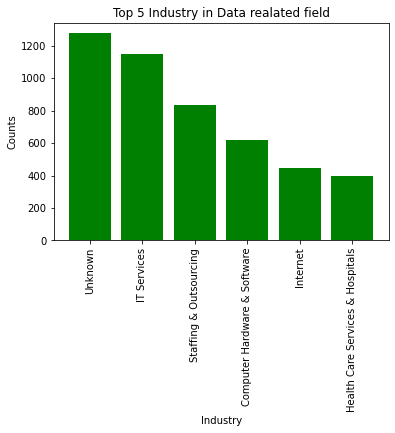

<Figure size 432x288 with 0 Axes>

In [5]:
#Plot the bar chart using pandas
y_values = industry_g['Industry']
x_values = industry_g.index.values

plt.bar(x_values,y_values, color="green", align="center")

# Formatting - title and axes
plt.title("Top 5 Industry in Data realated field")
plt.xlabel("Industry")
plt.ylabel("Counts")

plt.xticks(rotation = 90)

# Show and layout
plt.show()
plt.tight_layout()

In [6]:
# Sort to find Top 5 Company
                                               
company_ranking = final_df['Company Name'].value_counts(sort=True)
company = pd.DataFrame(company_ranking)
company_g = company.head(5)
company_g

Company Name
Apple                                       88
Staffigo Technical Services, LLC            86
Amazon                                      78
IBM                                         64
Diverse Lynx                                62

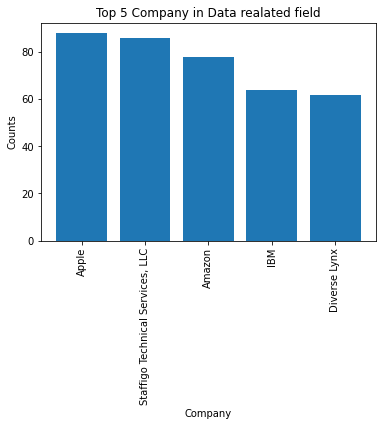

<Figure size 432x288 with 0 Axes>

In [10]:
#Plot the bar chart using pandas
y_values = company_g['Company Name']
x_values = company_g.index.values

plt.bar(x_values,y_values, align="center")

# Formatting - title and axes
plt.title("Top 5 Company in Data realated field")
plt.xlabel("Company")
plt.ylabel("Counts")

plt.xticks(rotation = 90)
# Show and layout
plt.show()
plt.tight_layout()

In [11]:
# Use the GoogleV3 geolocator
geolocator = GoogleV3(g_key)

# Use group by
location_groupby = final_df.groupby("Location")

job_title = location_groupby["Job Title"].first()
job_count = location_groupby["Job Title"].count()
location = location_groupby["Location"].first()


job_by_location_df = pd.DataFrame(
    {
        "Job Title" : job_title,
        "Job Count": job_count,
        "Location" : location
    }
)


# Use for loop to loops over table
for index, row in job_by_location_df.iterrows():
    # Initiate geocode function
    location = geolocator.geocode(row["Location"], timeout=10)
    # Locate the location and get an output lat & lng
    job_by_location_df.loc[index,"Latitude"] = location.latitude
    job_by_location_df.loc[index,"Longitude"] = location.longitude
    
job_by_location_df

Job Title  \
Location                                                                
Addison, TX                                            Data Scientist   
Alachua, FL                                Data Management Analyst II   
Alameda, CA                             Sr. Data Analyst( Healthcare)   
Alhambra, CA                                   Senior Data Bi Analyst   
Allegheny West, PA                                       Data Analyst   
...                                                               ...   
Woodbridge, NJ               Senior Business Analyst, Data Management   
Woodcliff Lake, NJ  Clinical Data Designer (Sr. SDTM Programmer/An...   
Woodland Hills, CA                                     Data Scientist   
Woodridge, IL                              Manufacturing Data Analyst   
Yorktown, VA                  Jr Management Analyst (Data Management)   

                    Job Count            Location   Latitude   Longitude  
Location                                                                  
Addison, TX                 6         Addison, TX  32.961790  -96.829169  
Alachua, FL                 1         Alachua, FL  29.793814  -82.494423  
Alameda, CA                 1         Alameda, CA  37.779872 -122.282185  
Alhambra, CA                2        Alhambra, CA  34.095287 -118.127015  
Allegheny West, PA          3  Allegheny West, PA  40.451993  -80.015763  
...                       ...                 ...        ...         ...  
Woodbridge, NJ              1      Woodbridge, NJ  40.557599  -74.284602  
Woodcliff Lake, NJ          1  Woodcliff Lake, NJ  41.023430  -74.066530  
Woodland Hills, CA         15  Woodland Hills, CA  34.165357 -118.608975  
Woodridge, IL               2       Woodridge, IL  41.746975  -88.050341  
Yorktown, VA                1        Yorktown, VA  37.238756  -76.509673  

[334 rows x 5 columns]

In [12]:
# Creates a new DF with the 5 locations with most job openings

top_5_df = job_by_location_df.nlargest(5, "Job Count", keep="first")
top_5_df

Job Title  Job Count       Location  \
Location                                                                   
New York, NY             Senior Data Scientist        800   New York, NY   
Chicago, IL                     Data Scientist        652    Chicago, IL   
Austin, TX        Data Scientist (Engineering)        625     Austin, TX   
San Diego, CA              Lead Data Scientist        561  San Diego, CA   
Houston, TX    Quantitative Research Scientist        490    Houston, TX   

                Latitude   Longitude  
Location                              
New York, NY   40.712775  -74.005973  
Chicago, IL    41.878114  -87.629798  
Austin, TX     30.267153  -97.743061  
San Diego, CA  32.715738 -117.161084  
Houston, TX    29.760427  -95.369803

In [13]:
# Set heatmap paramaters
location = job_by_location_df[["Latitude","Longitude"]]
weight = job_by_location_df["Job Count"]

# Plot Heatmap
fig = gmaps.figure()

# create heat layer
heat_layer = gmaps.heatmap_layer(location,
                                 weights=weight,
                                 dissipating=False,
                                 max_intensity=100,
                                 point_radius=1)

# Add layer
fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))

In [14]:
# Uses the template to create the text setup for the markers
info_box_template = """
<dl>
<dt>Job</dt><dd>{Job Title}</dd>
<dt>Job Opening</dt><dd>{Job Count}</dd>
<dt>Location</dt><dd>{Location}</dd>
</dl>
"""

# Stores the information for each marker
job_info = [
    info_box_template.format(**row) for index, row in top_5_df.iterrows()
]

# Stores data for map layers
locations_marker = top_5_df[["Latitude", "Longitude"]]

# create marker layer
marker_layer = gmaps.marker_layer(locations_marker,
                                  info_box_content=job_info)
# Add layer
fig.add_layer(marker_layer)

fig

Figure(layout=FigureLayout(height='420px'))